<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV and load csv file into jupyter notebook
house_csv = "Sacramento_transactions.csv"
data= pd.read_csv(house_csv)

In [3]:
# check the first 5 rows of data frame
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
# get names of data frame columns
data.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [5]:
# check the number of rows and columns of the dataframe
data.shape
print('This data frame has (ROWS, COLUMNS):', data.shape)

This data frame has (ROWS, COLUMNS): (985, 12)


In [6]:
# check last 5 rows of data frame
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [7]:
# check for null values in dataframe
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
# get info for data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
# zip column needs to be changed as a string value instead of an integer value, lets create it into a new data frame
# lets call the new data frame as data_zipstr
data_zipstr=data.astype({'zip':str})
data_zipstr.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [10]:
#lets covert sale_date to datetime datatype
data_zipstr['sale_date'] = pd.to_datetime(data_zipstr['sale_date'])
data_zipstr.dtypes

/Users/christophertloo/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1201: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


street               object
city                 object
zip                  object
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
latitude            float64
longitude           float64
dtype: object

In [11]:
# extract day from sale_date and save in a new column
day_datetime = data_zipstr.sale_date.dt.day
data_zipstr['day'] = day_datetime

In [12]:
# describe data_zipstr, note that the zip column is gone as it is converted into a string format!
# the df.describe() method only shows values which are numeric in value and not categorical columns!
data_zipstr.describe()

,beds,baths,sq__ft,price,latitude,longitude,day
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982,18.217259
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278,2.131239
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704,15.000000
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127,16.000000
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220,19.000000
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778,20.000000
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599,21.000000


In [13]:
# check the original dataframe to see if this is the case, 
# 'zip' column is as expected still in the original dataframe due to it still being in numeric type. 
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


Text(0, 0.5, 'City')

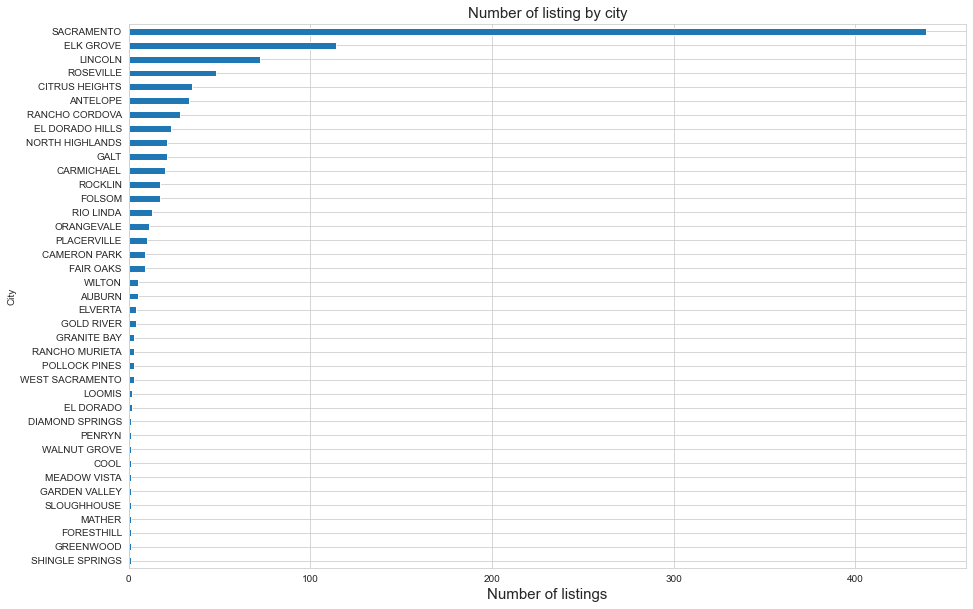

In [14]:
# lets make a bar plot of 'city' in the new data_zipstr dataframe
data_city_groupby = data_zipstr.groupby('city')['city'].count()
plt.figure(figsize=(15,10))
sorted_city_groupby = data_city_groupby.sort_values()
sorted_city_groupby.plot.barh()
plt.title('Number of listing by city',fontsize = 15)
plt.xlabel('Number of listings',fontsize=15)
plt.ylabel('City',fontsize = 10)

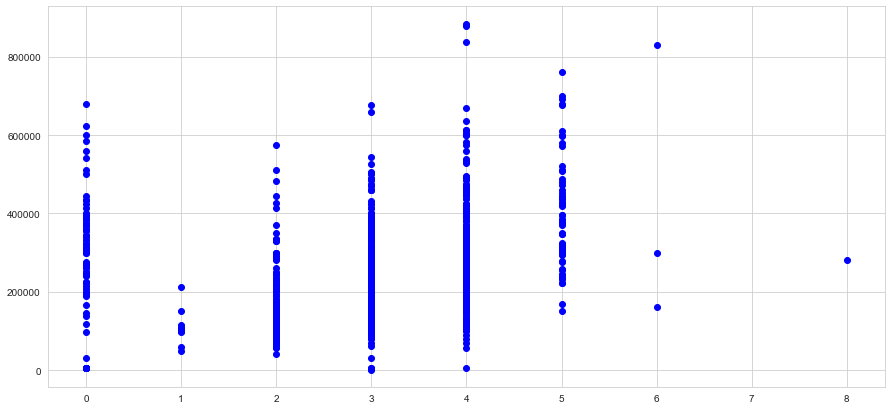

In [15]:
fig = plt.figure(figsize=(15,7))
 # get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data ,beds is not a continous numerical variable...
ax.scatter(data['beds'], data['price'], c='b')

In [16]:
# create a new 'type' ('Plot') which have 0 beds

no_beds = data_zipstr[data_zipstr.beds == 0]
indicies = no_beds.type.index
data_zipstr.iloc[indicies,7] = 'Plot'
data_zipstr.type.value_counts()

Residential     818
Plot            108
Condo            46
Multi-Family     13
Name: type, dtype: int64

Text(0, 0.5, 'type')

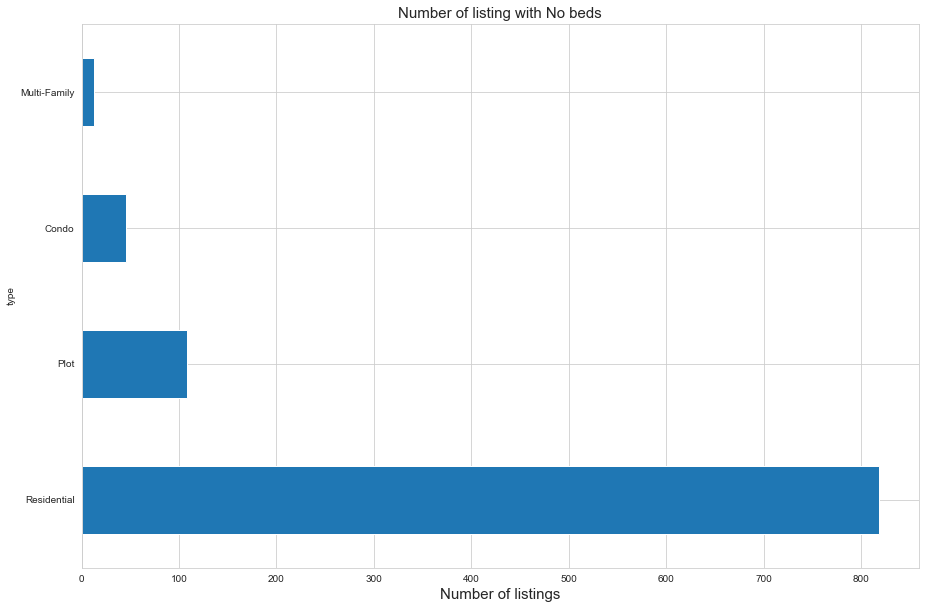

In [17]:
# create a bar plot of properties with Zero Beds
plt.figure(figsize=(15,10))
data_zipstr.type.value_counts().plot.barh()
plt.title('Number of listing with No beds',fontsize = 15)
plt.xlabel('Number of listings',fontsize=15)
plt.ylabel('type',fontsize = 10)

In [18]:
# check the unique values of the type columns
data['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

# lets check geo-location of properties in this USA dataset
# import the library

import folium
import pandas as pd

# Make an empty map -- set map canvas
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[38.575764, -121.478851], zoom_start=10)

# add circle/marker one by one on the map
for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

In [48]:

# Make an empty map -- set map canvas, 37.76, -122.45 is the initital location of SF, USA

m = folium.Map(location=[38.575764, -121.478851], zoom_start=10)

# add circle/marker one by one on the map
for i in range(0, len(data.head(1000))): folium.Marker( location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']] ).add_to(m)
 

In [49]:
# display the map
display(m)

In [19]:
# we need to subset a new dataframe as the original dataset is not cleaned as there is sq__ft=0
data_cleaned = data[data['sq__ft'] != 0] 

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [20]:
# ANSWER = PRICE
# target variable is price as we need to predict price.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [21]:
# ANSWER, the Independent variables = Predictor variables are

## beds
## baths
## sqft
## Type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [22]:
# ANSWER
# check correlation for original dataset
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [23]:
# check correlation for cleaned dataset
data_cleaned.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.219591,-0.134134,-0.562983
beds,-0.072673,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,-0.103332,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,-0.101560,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,-0.219591,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.134134,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,-0.562983,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [24]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [25]:
# ANSWER... Set X(predictor) and y(target) variables
# method 1
X = data_cleaned['sq__ft'].values.reshape(-1,1)  # or use this code: X = data_cleaned[['sq__ft']]
y = data_cleaned['price']

In [26]:
# method 2
X = data_cleaned[['sq__ft']]
y = data_cleaned['price']

In [27]:
linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_, linreg.intercept_)

[125.21648668] 30210.633866918943


In [28]:
print ('Linear Regression coefficient =',linreg.coef_)

Linear Regression coefficient = [125.21648668]


In [29]:
print('Linear Regression intercept =',linreg.intercept_)

Linear Regression intercept = 30210.633866918943


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [30]:
# ANSWER...... R score = R^2 = linreg.score(X, y)
linreg.score(X, y)

0.4812307133326901

In [31]:
# print out the R2 score
print('R2 score=', linreg.score(X,y))

R2 score= 0.4812307133326901


### 3. Splitting Data

In [32]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [33]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [34]:
# ANSWER
## Check training/test data
# About training
print('X_train is a %s' % type(X_train),"type")
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train),"type")
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'pandas.core.frame.DataFrame'> type
X_train has %d rows 651

Sample of X_train__________________________________________________
     sq__ft
635    1890
280    1284
189    1266
695    2306
438     988
437    1516
47     1955
414    1000
297    2295
638    1264

y_train is a <class 'pandas.core.series.Series'> type
y_train has %d rows (651,)

Sample of y_train__________________________________________________
635    137721
280    300000
189    140000
695    204918
438    223139
437    222900
47     166357
414    182000
297    350000
638    140000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [35]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[118.18167105] 36839.07207404816


In [36]:
print ('Linear Regression coefficient =',linreg.coef_)

Linear Regression coefficient = [118.18167105]


In [37]:
print('Linear Regression intercept =',linreg.intercept_)

Linear Regression intercept = 36839.07207404816


In [38]:
# ANSWER
linreg.score(X_test, y_test)

0.4506523775528496

In [39]:
print('Linear Regression Score =',linreg.score(X_test, y_test))

Linear Regression Score = 0.4506523775528496


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [40]:

# ANSWER
linreg.intercept_, linreg.coef_

(36839.07207404816, array([118.18167105]))

In [41]:
print(linreg.intercept_)

36839.07207404816


In [42]:
print(linreg.coef_)

[118.18167105]


In [43]:
# Predict price from X_test....method 1
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: $', Ypred[0])

Predicted house price: $ 179129.80402421995


In [44]:
# ANSWER to predict price of house.......method 2
x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: $', Ypred[0])

Predicted house price: $ 179129.80402421995


#### Find the error

In [45]:
# Predict price from X_test

y_preds = linreg.predict(X_test)

y_preds[:10]

array([246729.71986766, 311611.45727683, 266466.05893384, 226875.19913042,
       177829.80564262, 211629.76356433, 443384.02050311, 161638.91670809,
       172275.26710303, 230420.64926207])

In [46]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds, squared=True)

10199493973.566374



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



